<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH6EJ3 Extracción Componentes Principales

## 1. Cargamos y/o instalamos las librerias necesarias

In [1]:
if(!require(devtools)){
    install.packages('devtools', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(devtools)
}
if(!require(ggbiplot)){
    install.packages('ggbiplot', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(ggbiplot)
}
if(!require(scales)){
    install.packages('scales', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(scales)
}
if(!require(grid)){
    install.packages('grid', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(grid)
}
if(!require(plyr)){
    install.packages('plyr', dependencies=c("Depends", "Imports"), repos='http://cran.es.r-project.org')
    require(plyr)
}

Loading required package: devtools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘devtools’”
also installing the dependencies ‘xml2’, ‘roxygen2’, ‘rversions’





  There are binary versions available but the source versions are later:
          binary source needs_compilation
xml2       1.2.5  1.3.2              TRUE
roxygen2   7.1.0  7.1.1              TRUE
rversions  2.0.1  2.0.2             FALSE
devtools   2.2.2  2.3.2             FALSE



installing the source packages ‘xml2’, ‘roxygen2’, ‘rversions’, ‘devtools’


Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘xml2’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘roxygen2’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘rversions’ had non-zero exit status”
Warning message in install.packages("devtools", dependencies = c("Depends", "Imports"), :
“installation of package ‘devtools’ had non-zero exit status”
Loading required package: devtools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘devtools’”
Loading required package: ggbiplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :


## 2. Cargamos los datos de un directorio local.

In [2]:
Alumnos_usos_sociales <- read.csv("../data/B2.332_Students.csv", comment.char="#")

# X contiene las variables que queremos trabajar
R <- Alumnos_usos_sociales[,c(31:34)]
head(R)

,G1,G2,G3,Supera
,<int>,<int>,<int>,<fct>
1,0,11,11,Si
2,9,11,11,Si
3,12,13,12,Si
4,14,14,14,Si
5,11,13,13,Si
6,12,12,13,Si


## 3. Cálculo de la *Singular Value Decomposition* (SVD) y de los valores que lo caracterizan.

In [3]:
# Generamos SVD
R.order  <- R
R.svd <-svd(R.order[,c(1:3)])

# D, U y V
R.svd$d
head(R.svd$u)
R.svd$v

[1] 655.82564  51.34035  31.52625

-0.01951348,0.152524017,-0.130424010
-0.02731492,0.023673988,-0.024927705
-0.03256743,-0.004733866,-0.027527862
-0.03697091,-0.006311903,-0.001888831
-0.03259648,0.022772287,-0.025197538
-0.03258524,0.007779281,0.012433138


-0.5684875,-0.73502282,0.3695448
-0.5758616,0.03472334,-0.8168095
-0.5875418,0.67715267,0.4430112


## 4. Calculo de la varianza acumulada en el primer factor

In [4]:
sum(R.svd$d)
var=sum(R.svd$d[1])
var
var/sum(R.svd$d)

[1] 738.6922

[1] 655.8256

[1] 0.8878199

## 5. Porcentaje de la varianza explicada por los svd generados

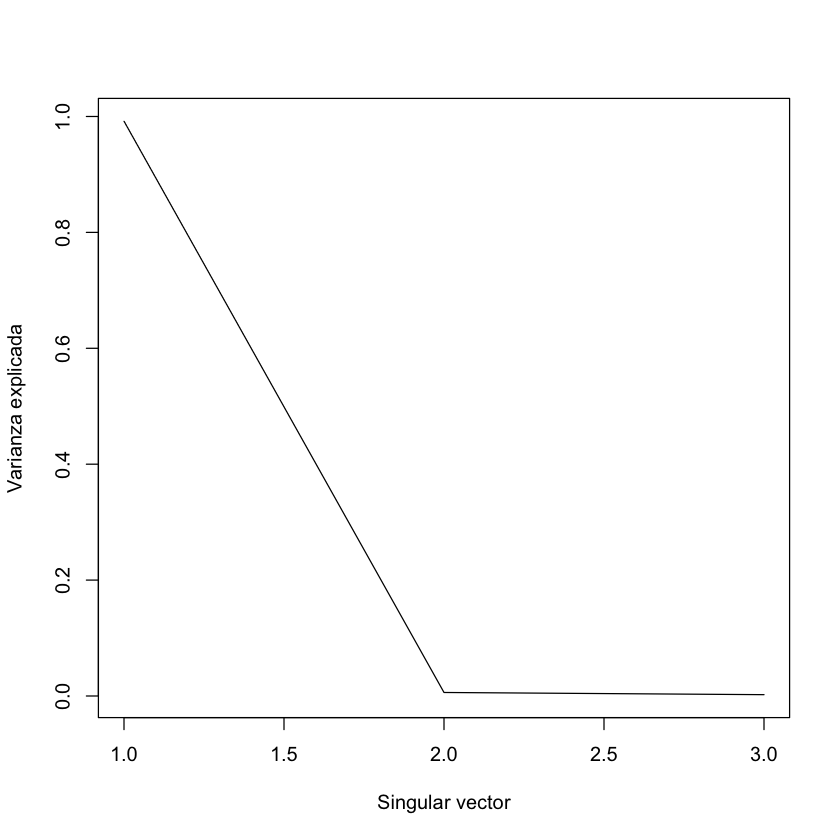

In [5]:
plot(R.svd$d^2/sum(R.svd$d^2),type="l",xlab="Singular vector",ylab="Varianza explicada")

## 6. Porcentaje de la varianza acumulada explicada 

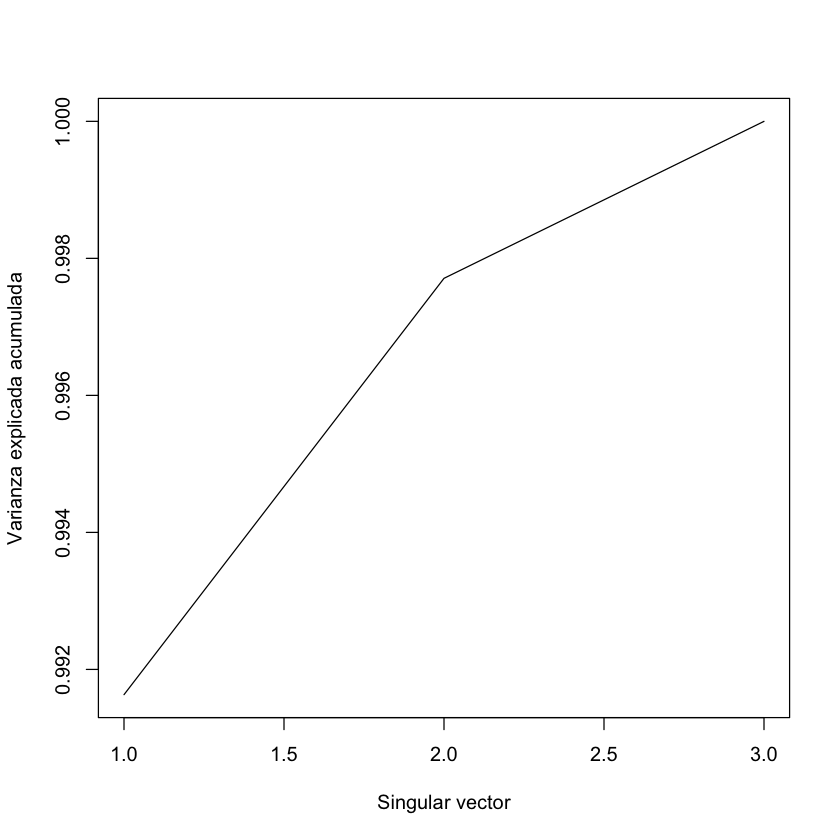

In [6]:
plot(cumsum(R.svd$d^2/sum(R.svd$d^2)), type="l", xlab="Singular vector", ylab="Varianza explicada acumulada")

## 7. Visualización

Creamos un gráfico con el primer y segundo vector asignando colores, donde:
- rojo indica que 'no supera'
- verde indica que 'supera'

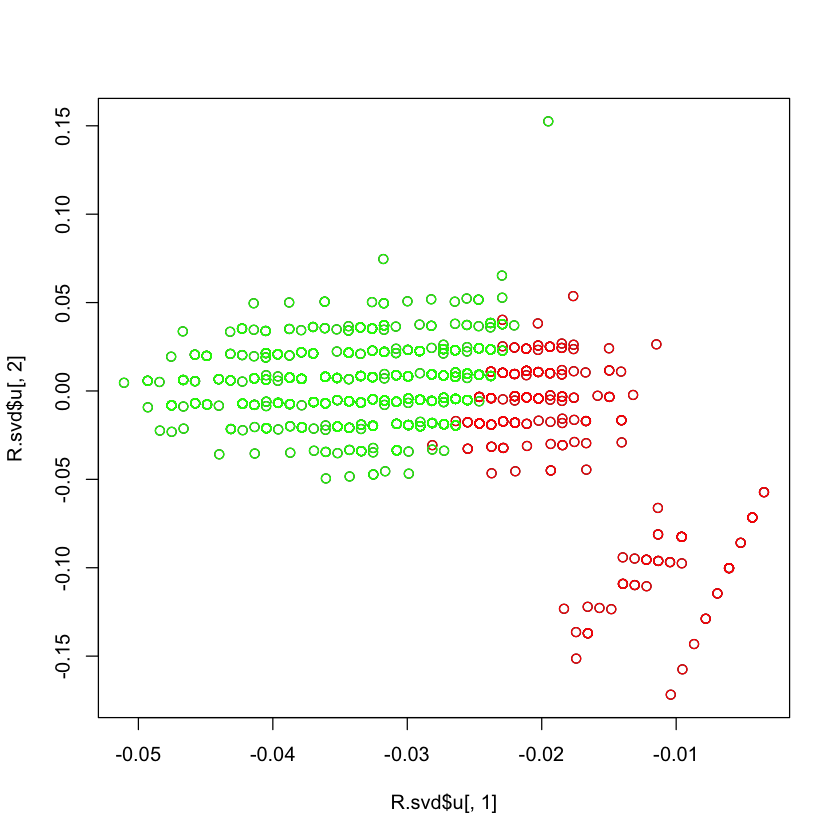

In [7]:
# Dibujamos primero todos los scores de comp2 y comp1
Y <- R.order[,4]
plot(R.svd$u[,1],R.svd$u[,2])

# Asignamos rojo a no supera y verde a si supera
points(R.svd$u[Y=="No",1],R.svd$u[Y=="No",2],col="red")
points(R.svd$u[Y=="Si",1],R.svd$u[Y=="Si",2],col="green")

## 8. Reconstrucción de la imagen de los datos a partir de los SVD

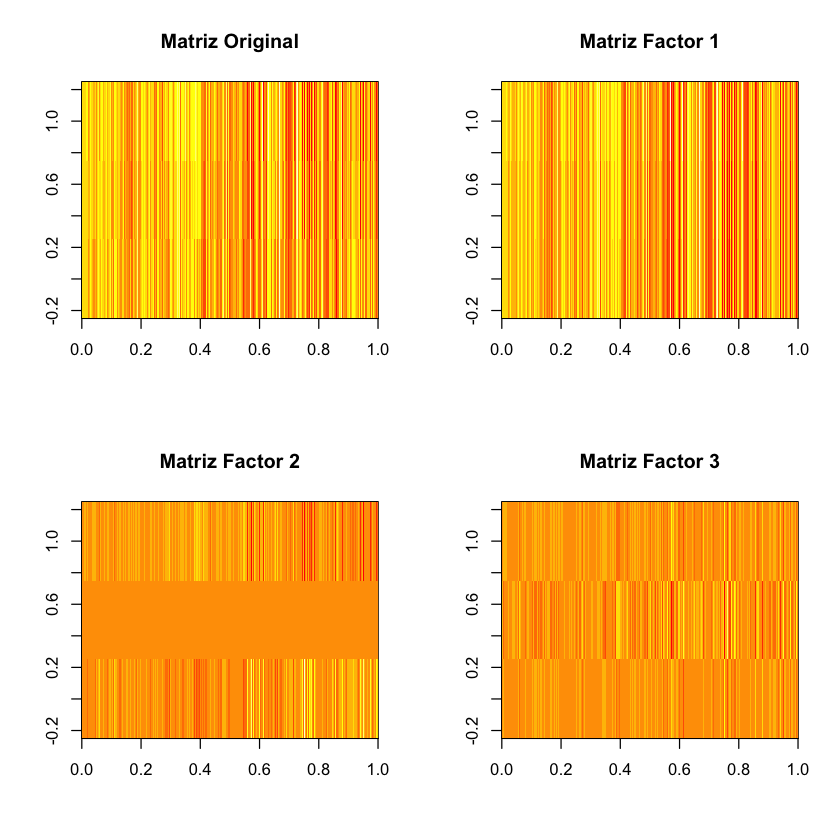

In [8]:
R.recon1=R.svd$u[,1]%*%diag(R.svd$d[1],length(1),length(1))%*%t(R.svd$v[,1])
R.recon2=R.svd$u[,2]%*%diag(R.svd$d[2],length(2),length(2))%*%t(R.svd$v[,2])
R.recon3=R.svd$u[,3]%*%diag(R.svd$d[3],length(3),length(3))%*%t(R.svd$v[,3])
par(mfrow=c(2,2))
image(as.matrix(R.order[,c(1:3)]),main="Matriz Original")
image(R.recon1,main="Matriz Factor 1")
image(R.recon2,main="Matriz Factor 2")
image(R.recon3,main="Matriz Factor 3")